# Question and Answer Chat Bots

**copyright by pierian Data Inc.**

## Loading the Data

Working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt", "rb") as fp:
    train_data =  pickle.load(fp)

In [3]:
with open("test_qa.txt", "rb") as fp:
    test_data =  pickle.load(fp)

----

## Exploring the Format of the Data

In [64]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(test_data)

1000

In [7]:
len(train_data)

10000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

In [13]:
vocab = set()

In [14]:
all_data = test_data + train_data

In [15]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [16]:
vocab.add('no')
vocab.add('yes')

In [17]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [18]:
vocab_len = len(vocab) + 1 

In [24]:
len(all_data[0][0])

12

In [25]:
max_story_len = max([len(data[0]) for data in all_data])

In [26]:
max_story_len

156

In [27]:
max_question_len = max([len(data[1]) for data in all_data])

In [28]:
max_question_len

6

## Vectorizing the Data

In [29]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [30]:
vocab_size = len(vocab) + 1

-----------

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [34]:
tokenizer.word_index

{'apple': 1,
 'garden': 2,
 '?': 3,
 'milk': 4,
 'john': 5,
 'left': 6,
 'yes': 7,
 'bathroom': 8,
 'is': 9,
 'back': 10,
 'discarded': 11,
 '.': 12,
 'up': 13,
 'sandra': 14,
 'office': 15,
 'down': 16,
 'to': 17,
 'picked': 18,
 'dropped': 19,
 'hallway': 20,
 'went': 21,
 'travelled': 22,
 'the': 23,
 'got': 24,
 'put': 25,
 'moved': 26,
 'took': 27,
 'daniel': 28,
 'journeyed': 29,
 'in': 30,
 'mary': 31,
 'no': 32,
 'bedroom': 33,
 'grabbed': 34,
 'there': 35,
 'kitchen': 36,
 'football': 37}

In [35]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [36]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [37]:
len(train_story_text)

10000

In [38]:
len(train_story_seq)

10000

In [39]:
word_index = tokenizer.word_index

### Functionalize Vectorization

In [40]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story
    max_question_len: the length of the longest question
    

    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. 
    1. loop for every story, query , and answer in the data. 
    2. convert the raw words to an word index value. 
    3. append each set to their appropriate output list. 
    4. once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences. 
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [41]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [42]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [43]:
inputs_test

array([[ 0,  0,  0, ..., 23, 33, 12],
       [ 0,  0,  0, ..., 23,  2, 12],
       [ 0,  0,  0, ..., 23,  2, 12],
       ...,
       [ 0,  0,  0, ..., 23,  1, 12],
       [ 0,  0,  0, ..., 23,  2, 12],
       [ 0,  0,  0, ...,  1, 35, 12]], dtype=int32)

In [44]:
queries_test

array([[ 9,  5, 30, 23, 36,  3],
       [ 9,  5, 30, 23, 36,  3],
       [ 9,  5, 30, 23,  2,  3],
       ...,
       [ 9, 31, 30, 23, 33,  3],
       [ 9, 14, 30, 23,  2,  3],
       [ 9, 31, 30, 23,  2,  3]], dtype=int32)

In [45]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,
         0.,   0.,   0.,   0.,   0.])

In [47]:
tokenizer.word_index['yes']

7

In [48]:
tokenizer.word_index['no']

32

## Creating the Model

In [50]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM

### Placeholders for Inputs

In [51]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

## Building the Networks

## Encoders

### Input Encoder m

In [52]:
# Input gets embedded to a sequence of vectors
# output_dim=64 は論文中で試行されていた数 
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))
# output: (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [53]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)
# output_dim=max_question_lenについて
# encoder m と quetion encoder(論文中ではu)の内積を取った後のdimensionは(samples, story_maxlen, query_maxlen)

### Question Encoder

In [54]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)
# 基本的には以下
# input_dim: 正の整数．語彙数．入力データの最大インデックス + 1．
# output_dim: 0以上の整数．密なembeddingsの次元数．
# input_length: 入力の系列長（定数）．

/Users/kodaikunimitsu/anaconda3/envs/nlp_course/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Encode the Sequences

In [55]:
# encode input sequence and questions
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [56]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
# query_maxlenの内積
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [57]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [58]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [59]:
answer

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_18>

In [60]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)
# 論文中の最後のWがこれに当たる？

In [61]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [62]:
# output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
# loss='categorical_crossentropy'について
# outputがvocab_sizeなので、'categorical_crossentropy'を選択しているが、実際はYesもしくはNoの要素の確率だけ出てくるイメージ。

In [63]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 156, 64)   │      2,432 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 6, 64)     │      2,432 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 156, 6)    │          0 │ sequential[0][0], │
│                     │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 156, 6)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 156, 6)    │        228 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 156, 6)    │          0 │ activation[0][0], │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 6, 156)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6, 220)    │          0 │ permute[0][0],    │
│ (Concatenate)       │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │     32,384 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      1,254 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 38)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4819 - loss: 1.1431 - val_accuracy: 0.5030 - val_loss: 0.7027
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4967 - loss: 0.7131 - val_accuracy: 0.5030 - val_loss: 0.6944
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5050 - loss: 0.6969 - val_accuracy: 0.4970 - val_loss: 0.6940
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5084 - loss: 0.6961 - val_accuracy: 0.4970 - val_loss: 0.6965
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4986 - loss: 0.6963 - val_accuracy: 0.4970 - val_loss: 0.6935
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5002 - loss: 0.6956 - val_accuracy: 0.5030 - val_loss: 0.6932
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5018 - loss: 0.6948 - val_accuracy: 0.4970 - val_loss: 0.6937
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5012 - loss: 0.6949 - val_accu

10000/10000 [==============================] - 4s 350us/step - loss: 0.1100 - acc: 0.9599 - val_loss: 0.2855 - val_acc: 0.9160
Epoch 118/120
10000/10000 [==============================] - 3s 349us/step - loss: 0.1012 - acc: 0.9610 - val_loss: 0.2887 - val_acc: 0.9200
Epoch 119/120
10000/10000 [==============================] - 4s 352us/step - loss: 0.1040 - acc: 0.9618 - val_loss: 0.2774 - val_acc: 0.9120
Epoch 120/120
10000/10000 [==============================] - 3s 349us/step - loss: 0.1010 - acc: 0.9615 - val_loss: 0.3139 - val_acc: 0.9120


### Saving the Model

In [71]:
filename = 'my_own_chatbot_120_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


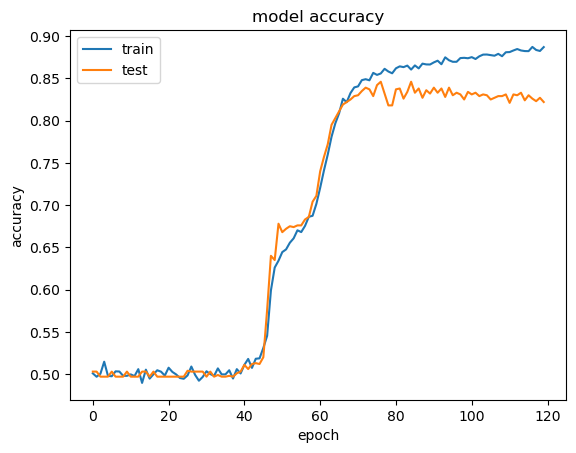

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [74]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [75]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [76]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [77]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [78]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [70]:
tokenizer.word_index.items()

dict_items([('apple', 1), ('garden', 2), ('?', 3), ('milk', 4), ('john', 5), ('left', 6), ('yes', 7), ('bathroom', 8), ('is', 9), ('back', 10), ('discarded', 11), ('.', 12), ('up', 13), ('sandra', 14), ('office', 15), ('down', 16), ('to', 17), ('picked', 18), ('dropped', 19), ('hallway', 20), ('went', 21), ('travelled', 22), ('the', 23), ('got', 24), ('put', 25), ('moved', 26), ('took', 27), ('daniel', 28), ('journeyed', 29), ('in', 30), ('mary', 31), ('no', 32), ('bedroom', 33), ('grabbed', 34), ('there', 35), ('kitchen', 36), ('football', 37)])

In [79]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9930905


## Writing My Own Stories and Questions

only use words from the existing vocab

In [80]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [91]:
my_story = "Daniel is in the kitchen . Sandra journeyed the bathroom ."
my_story.split()

['Daniel',
 'is',
 'in',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'journeyed',
 'the',
 'bathroom',
 '.']

In [88]:
my_question = "Is Sandra in the bathroom ?"

In [89]:
my_question.split()

['Is', 'Sandra', 'in', 'the', 'bathroom', '?']

In [92]:
mydata = [(my_story.split(),my_question.split(),'no')]

In [93]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [94]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [95]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.91679496


# Fin!